# Visualisasi Geospatial sebaran kasus positif COVID19 di Indonesia per tanggal 2 Mei 2021 dengan basis provinsi  

Ridhwan Nashir
1301184259
IF42GAB01, Saya menggunakan dataset tanggal 2 mei 2021 yang saya peroleh dari website covid19.go.id karena tidak memperoleh data tanggal 1 mei


## Dataset and Library

In [2]:
# !pip install shapely
# !pip install gdal
# !pip install fiona
# !pip install pyproj
# !pip install geoplot
# !pip install rtree
# !pip install geopandas

In [4]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

In [5]:
# Upload Dataset
url = 'https://raw.githubusercontent.com/ridhwanashir/VD-Geospatial-Visualization-COV19/main/province.csv'
dataset = pd.read_csv(url) 
dataset.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,active,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,1003,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,1676,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,1961,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,847,102.315.674,-3.414.725
4,5,Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,3814,110.390.625,-7.863.382


In [6]:
del dataset['longitude']
del dataset['latitude']

In [22]:
dataset.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,active
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,1003
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,1676
2,3,Banten,Jawa,BT,Serang,11704877,1298,1961
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,847
4,5,Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,3814


In [8]:
# Upload Shapefile Indonesia
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!ls "/content/drive/My Drive/VD-Geospatial-COV19/"

gadm36_IDN_1.cpg   IND_KOT_point.shp   INDONESIA_PROP.shx
gadm36_IDN_1.dbf   IND_KOT_point.shx   Indo_provinces.sbx
gadm36_IDN_1.prj   INDONESIA_PROP.dbf  Indo_provinces.shp
gadm36_IDN_1.shp   INDONESIA_PROP.prj  Indo_provinces.shp.xml
gadm36_IDN_1.shx   INDONESIA_PROP.sbn  Indo_provinces.shx
IND_KOT_point.dbf  INDONESIA_PROP.sbx
IND_KOT_point.prj  INDONESIA_PROP.shp


In [10]:
# Read Map Provinsi
map_indo = gpd.read_file("/content/drive/My Drive/VD-Geospatial-COV19/gadm36_IDN_1.shp")
map_indo.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,None,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,None,None,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,None,None,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,None,None,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,None,None,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


In [20]:
# Read Point Kota
kota_indo = gpd.read_file("/content/drive/My Drive/VD-Geospatial-COV19/IND_KOT_point.shp")
kota_indo.head()

,Nama,Kode_unsur,geometry
0,INDRAMAYU,52.0,POINT Z (108.32156 -6.33035 0.00000)
1,MAJALENGKA,52.0,POINT Z (108.22490 -6.83361 0.00000)
2,KUNINGAN,52.0,POINT Z (108.47913 -6.98138 0.00000)
3,PEMALANG,52.0,POINT Z (109.37553 -6.89043 0.00000)
4,TEGAL,52.0,POINT Z (109.12930 -6.87070 0.00000)


In [27]:
merged_data = map_indo.merge(dataset, left_on="NAME_1", right_on="province_name")
merged_data.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,active
0,IDN,Indonesia,IDN.1_1,Aceh,None,None,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...",1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,1003
1,IDN,Indonesia,IDN.2_1,Bali,None,None,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...",2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,1676
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,None,None,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",17,Bangka Belitung,Sumatra,BB,Pangkalpinang,1343900,82,1686
3,IDN,Indonesia,IDN.4_1,Banten,None,None,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",3,Banten,Jawa,BT,Serang,11704877,1298,1961
4,IDN,Indonesia,IDN.5_1,Bengkulu,None,None,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ...",4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,847


## Visualisasi

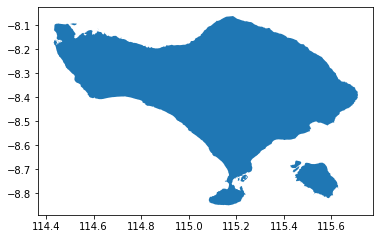

In [12]:
# Melihat Contoh Provinsi
merged_data[merged_data.NAME_1=="Bali"].plot()

Text(0.5, 1.0, 'Kasus Aktif COVID-19 di Indonesia per tanggal 2 Mei 2021')

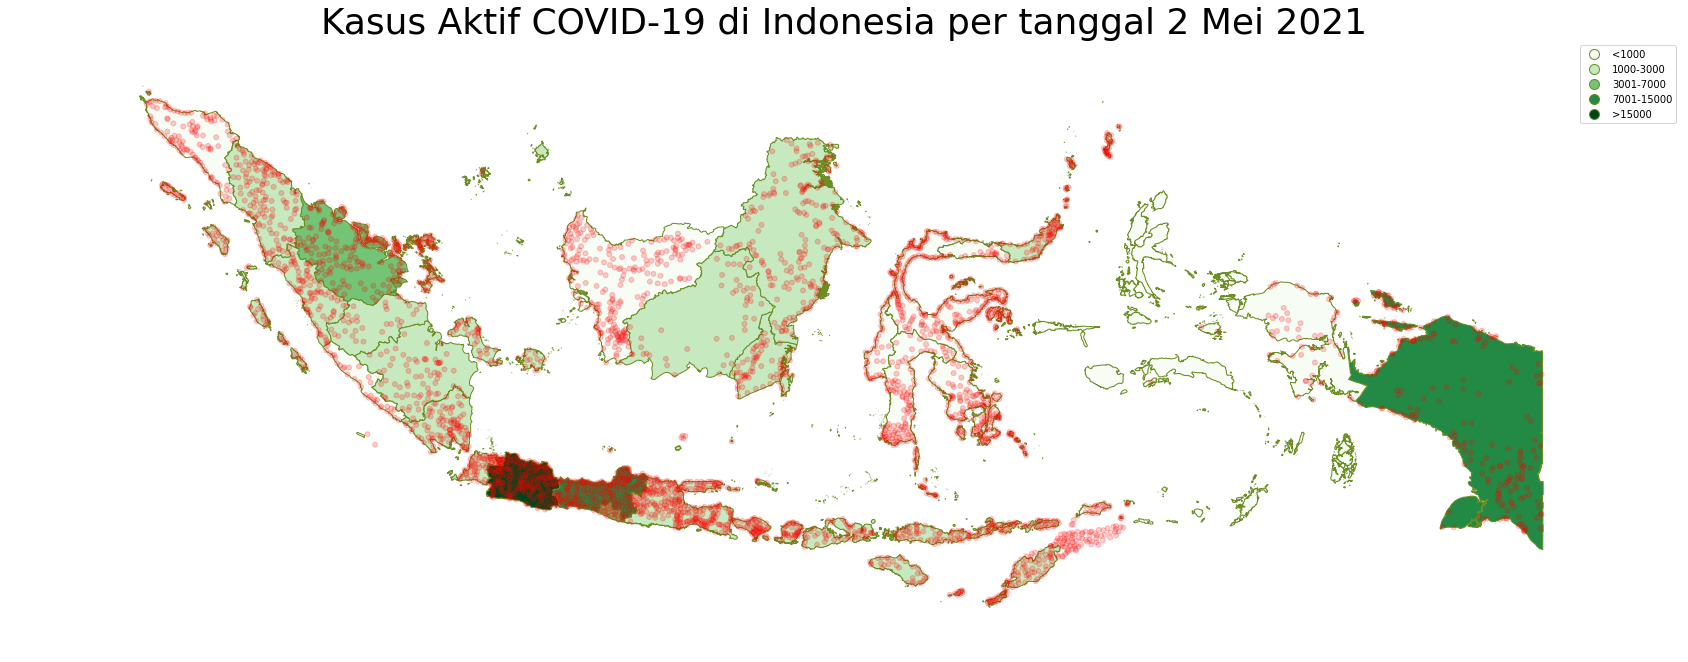

In [28]:
ax = gplt.choropleth(
    merged_data,
    hue="active",
    edgecolor="olivedrab",
    linewidth=1,
    cmap="Greens",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "<1000", "1000-3000", "3001-7000",
        "7001-15000", ">15000"
    ],
    alpha = 1,
    figsize=(30, 30)
)

ax = gplt.pointplot(
    kota_indo,
    color = 'red',
    limits=(3, 50),
    zorder=2, 
    alpha = 0.2,
    ax=ax
)

ax.set_title(
    "Kasus Aktif COVID-19 di Indonesia per tanggal 2 Mei 2021",
    fontsize=36
)